### 목표 : 미니 배치 기반 기계학습 진행 실습
- 확률적 경사하강법 기반의 알고리즘 적용 모델
- 데이터의 처음부터 끝까지 (=에포크) 학습 후 가중치(w)와 절편(b)을 업데이트하는 방식에서 에포크를 미니 배치 크기만큼 학습 후 가중치(w)와 절편(b) 업데이트 진행.
- 장점
    * 온라인 학습 즉, 점진적 학습 가능 => partial_fit() # 기존 모델에 추가로 1 에포크 학습
    * 기존의 다른 모델보다 학습 속도 빠름(速) ==> 랜덤으로 한 개의 데이터를 추출 후 학습 진행
    * 조기 학습 중단 설정 가능.
- 단점 :
    * 전체 학습에 비해 정확도가 떨어질 수 있음!

+ +보통 32개를 잡음 = 그냥 했을 때 대체로 결과가 괜찮아서 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [87]:
# 모듈 로딩
import pandas as pd

data = '../data/fish.csv'

In [88]:
# 데이터 로딩
fishDF = pd.read_csv(data)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


[2] 데이터 전처리 => 학습을 위한 가공<hr>

[2-1] 피처와 타겟 분리

In [89]:
featureDF = fishDF[fishDF.columns[1:]]
targetDF = fishDF['Species']

print(f'피처 => {featureDF.shape}, 타겟 => {targetDF.shape}')

피처 => (159, 5), 타겟 => (159,)


[2-2] 학습 / 테스트용 데이터셋 분리

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, stratify = targetDF, random_state = 41)

In [91]:
print(f'[훈련용] => {X_train.shape}, {y_train.shape}')
print(f'[테스트용] => {X_test.shape}, {y_test.shape}')

[훈련용] => (119, 5), (119,)
[테스트용] => (40, 5), (40,)


[2-2] 피처 => 스케일링

In [92]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)

StandardScaler()

In [93]:
# 훈련용 데이터셋 스케일링
scaled_X_train = std.transform(X_train)

# 테스트용 데이터셋 스케일링
scaled_X_test = std.transform(X_test)

[3] 학습 진행 <hr>
- 학습 방법 : 확률적경사하강법(SGD) 기반의 분류

In [113]:
# 혼자있고 싶어요...다 나가주세요...
# 모델 인스턴스 생성
from sklearn.linear_model import SGDClassifier

#model1 = SGDClassifier(random_state=41)
#model1 = SGDClassifier(random_state=41, verbose=1) # verbose 기본값은 0, 메시지 출력 : Using backend SequentialBackend with 1 concurrent workers.
#model1 = SGDClassifier(random_state=41, verbose=0, loss='log_loss', n_iter_no_change=1000) # 멈추지 않고 다 돌아가서 성능이 올라가긴 함..!:) 88에서 94까지 상승
#model1 = SGDClassifier(random_state=41, verbose=0, loss='log_loss', n_iter_no_change=10) # 과대적합. 학습 점수에 비해 테스트 점수가 낮음.
#model1 = SGDClassifier(random_state=41, verbose=0, loss='log_loss', n_iter_no_change=100) # 굳..!:-)

#model1 = SGDClassifier(random_state=41, verbose=0, loss='log_loss', alpha=0.5) # 0.0001이 디폴트인데 0.5면 규제 강화 -> 과대적합을 해결하기 위해 강도 조절 시 사용.(# 반드시 점수가 떨어지는 것은 아님.)

model1 = SGDClassifier(random_state=41, verbose=0, loss='log_loss', alpha=0.1)
# alpha l2 값의 강도 조절 ! 규제 ▲ → 가중치의 값을 작게 하겠다 → 회귀곡선을 구불구불하지 않고 대충 비스듬하게 만들겠다

model1.fit(scaled_X_train, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=41)

In [114]:
train_score1 = model1.score(scaled_X_train, y_train)
test_score1 = model1.score(scaled_X_test, y_test)

In [115]:
print(f'[기본 SGD] 학습 점수 : {train_score1}, 테스트 점수 : {test_score1}')

[기본 SGD] 학습 점수 : 0.6974789915966386, 테스트 점수 : 0.725


In [112]:
# 학습 후 설정된 파라미터 즉 모델 파라미터
print(f'n_iter_ : {model1.n_iter_}') # defalut 값이 1000번인데, 34번만에 알아서 멈춘 것!

n_iter_ : 22


- 1 에포크씩 점진적으로 학습 진행 => paritial_fit()

In [98]:
# 모델 인스턴스 생성
model2 = SGDClassifier(loss='log_loss')
model2.partial_fit(scaled_X_train, y_train, y_train.unique()) # 주어진 샘플에서 1 에포크 실행. 기본이 max_iter = 1이라 한 번 돌고 멈춤!

SGDClassifier(loss='log_loss')

In [99]:
train_score2 = model2.score(scaled_X_train, y_train)
test_score2 = model2.score(scaled_X_test, y_test)

In [100]:
# y_train.unique()
# >>>array(['Smelt', 'Whitefish', 'Bream', 'Roach', 'Perch', 'Parkki', 'Pike'],
#       dtype=object)

In [101]:
print(f'[기본SGD] 학습 점수 : {train_score2}, 테스트 점수 {test_score2}')

[기본SGD] 학습 점수 : 0.4957983193277311, 테스트 점수 0.425


In [102]:
trainScoreList = []
testScoreList=[]
for n in range(100) :
    model2.partial_fit(scaled_X_train, y_train, y_train.unique()) # 핏은 리셋 후 새로 시작. partial_fit => 부분적으로 돌아가는 듓..?
    train_score2 = model2.score(scaled_X_train, y_train)
    test_score2 = model2.score(scaled_X_test, y_test) 
    print(f'[{n+1}번 학습] [기본SGD] 학습 점수 : {train_score2}, 테스트 점수 {test_score2}')
    trainScoreList.append(train_score2)
    testScoreList.append(test_score2)
    count=0
    if (test_score2>=0.90) and (abs(test_score2 - train_score2) >= 0.03) :
        break
print(f'n => {n}')

[1번 학습] [기본SGD] 학습 점수 : 0.773109243697479, 테스트 점수 0.725
[2번 학습] [기본SGD] 학습 점수 : 0.6302521008403361, 테스트 점수 0.7
[3번 학습] [기본SGD] 학습 점수 : 0.7983193277310925, 테스트 점수 0.825
[4번 학습] [기본SGD] 학습 점수 : 0.7815126050420168, 테스트 점수 0.75
[5번 학습] [기본SGD] 학습 점수 : 0.7899159663865546, 테스트 점수 0.65
[6번 학습] [기본SGD] 학습 점수 : 0.773109243697479, 테스트 점수 0.675
[7번 학습] [기본SGD] 학습 점수 : 0.8151260504201681, 테스트 점수 0.8
[8번 학습] [기본SGD] 학습 점수 : 0.8487394957983193, 테스트 점수 0.8
[9번 학습] [기본SGD] 학습 점수 : 0.8739495798319328, 테스트 점수 0.775
[10번 학습] [기본SGD] 학습 점수 : 0.7983193277310925, 테스트 점수 0.725
[11번 학습] [기본SGD] 학습 점수 : 0.8571428571428571, 테스트 점수 0.775
[12번 학습] [기본SGD] 학습 점수 : 0.8067226890756303, 테스트 점수 0.725
[13번 학습] [기본SGD] 학습 점수 : 0.8991596638655462, 테스트 점수 0.875
[14번 학습] [기본SGD] 학습 점수 : 0.8319327731092437, 테스트 점수 0.825
[15번 학습] [기본SGD] 학습 점수 : 0.8403361344537815, 테스트 점수 0.725
[16번 학습] [기본SGD] 학습 점수 : 0.8151260504201681, 테스트 점수 0.8
[17번 학습] [기본SGD] 학습 점수 : 0.8235294117647058, 테스트 점수 0.825
[18번 학습] [기본SGD] 학습 점수 : 0.84033613

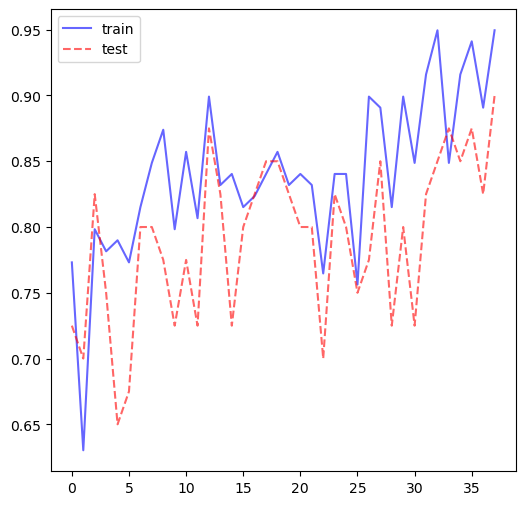

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(trainScoreList, 'b-', label = 'train', alpha=0.6)
plt.plot(testScoreList, 'r--', label = 'test', alpha=0.6)
plt.legend()
plt.show()